In this we will see how to use logistic regression for multiclass classification.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]  # here you have numeric data   

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

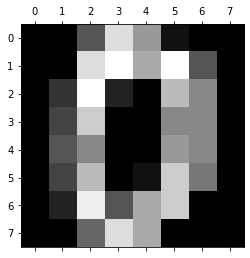

In [7]:
plt.gray()
plt.matshow(digits.images[0])  # here you have a data in image

<Figure size 432x288 with 0 Axes>

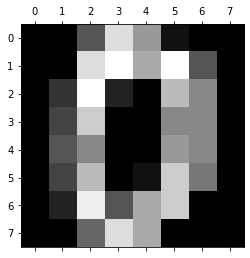

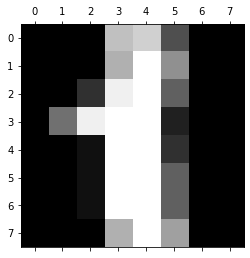

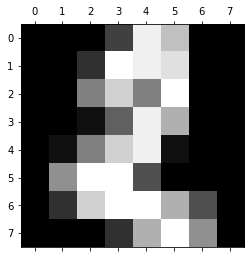

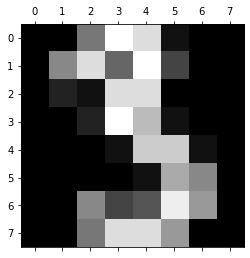

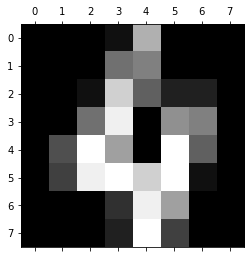

In [11]:
# printing first 5 sample

plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])

In [12]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [16]:
len(X_train)

1437

In [17]:
len(X_test)

360

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train,y_train)

C:\Users\MyPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.score(X_test,y_test)

0.9444444444444444

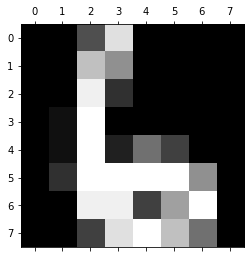

In [26]:
plt.matshow(digits.images[67]) # here we are picking up random sample

In [27]:
digits.target[67]

6

In [30]:
model.predict([digits.data[67]])

array([6])

In [31]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [33]:
# confusion matrix
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[41,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2, 33,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

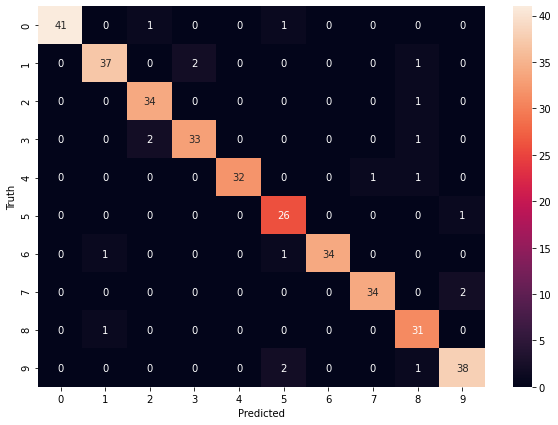

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# In this plot first is 41 which means 41 times the truth was 0 and my predicted it to be 0